In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy.stats import pearsonr

                  Barcode        ER      Fmax
0    ATTGGCTCAAGTGTTTGTTT  2.574194  39089.06
1    ATTTGCACGTGTACGGGTTG -0.371642  29860.44
2    TTTGCCTCAATTACATCTGT -0.802981  14550.30
3    ACTTCTGTGTGGAATTCATT  1.513106  39419.63
4    ATTTACTCATTTGCTTCCAG -0.748386  14423.63
..                    ...       ...       ...
842  CATGATGCGAAGGAAGATGT -4.761984  50718.12
843  CTTTGTTGAAGCGAATGTAT -1.330431  14017.37
844  TTAGGTTTGTTTCAATACGC -3.927994  14029.19
845  CTTCATTCAAGGCCTTCAAT -3.613885  16093.87
846  TCATGATTAAAGCAAGACTC -3.574357  39608.45

[847 rows x 3 columns]
PearsonRResult(statistic=0.5002456388779923, pvalue=7.779290635157194e-55)


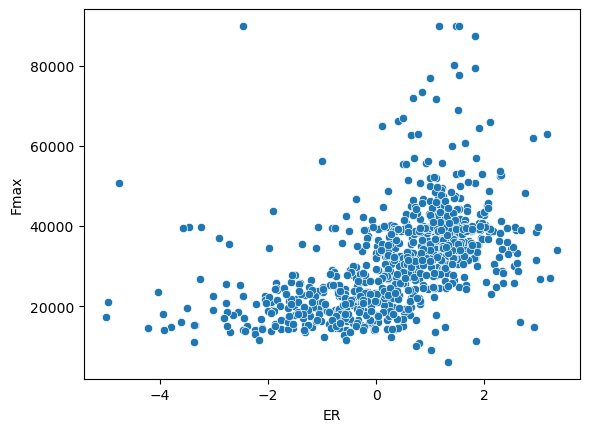

In [34]:
df = pd.read_csv("/projects/brpe7306/fab-library-barcoding/Match_all/_combined.csv")
df_mle = pd.read_csv(
    "/projects/brpe7306/fab-library-barcoding/MLE/output/4A8_CC121_combined_mle_all.csv"
)
df = df[df["Bin"].str.startswith("fitc")]
df["ER"] = np.log2((df["Rijk"] / df["Rjk"]) / (df["F_barcode"] / 154895))
df = df[df["Bin"] == "fitc-low33"]
df1 = df[["Barcode", "ER"]]
# df1 = df1.rename(columns=lambda x: re.sub('Mutations','Variant',x))
df2 = df_mle[["Barcode", "Fmax"]]
merged = pd.merge(df1, df2, on="Barcode")
print(merged)
print(pearsonr(merged["ER"], merged["Fmax"]))
sns.scatterplot(data=merged, x="ER", y="Fmax")
plt.show()